### 복습

In [ ]:
N-gram 이라는 LM을 이용함. LM을 가지고 문장생성이랑 띄어쓰기를 했음. 과제 란에 있음.
N-gram 이 왜 LM이냐면, 통계적으로 선행되는 특정한 토큰들이 주어졌을 떄 다음 단어는 뭐가 될지 확률을 갖고 있기 때문에 LM
P(토큰2|토큰1) => 자동으로 첫글자를 주면 최대의 확률값을 따라다니면 다음글자를 생성하면서 문장 생성
특히 우리나라 말은 띄어쓰기에 아주 민감하기 때문에 띄어쓰기가 주는 토큰화의 값이 강력함. 띄어쓰기를 가지고 형태소 분석을 해보면 암.
띄어쓰기를 붙힐 때 띄어쓸 떄 분석결과가 다름. 그 만큼 강력한 매개.

토크나이징 관련해서 확률값을 이용하는 다른 방법 봄. Branch Entropy. 이것은 결국 (-plogp)를 이용하는 방법
즉, 토큰1이 있을 때 뒤에 다른 토큰들. 예를 들어 앞에 어근,어간 있을 때 뒤에 활용되는 형태. 이런 분절을 자동으로 찾아내기 위한 방법.
형태소 분석기에서는 형태학 관점에서 형태소로 쪼개는 것. Branch entroyp는 데이터만 가지고 어느 음절부분에서 가장 엔트로피가 치솟는지 보는 것.
한 단어라면 상대적으로 엔트로피 값이 낮음. 근데 뒤에 활용이 붙는 다면 앞에 있는 게 어근, 어간일 확률이 매우 높아 뒤에 다양한 접사나 조사가 붙는
것이기 때문에 엔트로피가 치솟는 것. 엔트로피값이 낮았다가 치솟는 부분을 확인하면, 일반적인 토크나이징 기법들과 달리 활용은 하나의 원형을 가지기 때문
에.
우리가 모델 만들 때 피쳐의 수를 줄이는 방법 중 하나. 차원이 무작정 높아지고 커지는 게 좋은 것이 아님(차원의 저주). 데이터가 올바르게 해당 도메인을
나타낼 수 있게 해줘야 함. 따라서 토크나이징은 얼마나 좋은 토큰을 뽑느냐가 목표임.

In [ ]:
과제의 교수님 예제는,
ABCDEFGHIJKLMNOPQRS...
 *

1. P(B|A) = P(A, B)/P(A) = freq(A, B)/freq(A)
=> Max of B[-1] == ' '

A' '

2. * 이동

3. P(B|' ')

=> A' 'BCD' 'EF ...

base 가 N-gram 몇 개까지 볼 것이냐.

In [ ]:
오늘 할 것은 Branch Entropy 한 번 더. 그리고 응집력에 관한 cohesion 은 좀 고민.
Edit Dist. (음절 단위 비교 => 음소(자음, 모음))
Normalization => 이걸 해줘야 토큰화 preprocessing이 끝남

In [1]:
from konlpy.tag import Kkma, Komoran, Hannanum, Okt

### 수업

#### Branch Entropy

In [2]:
def fileids(path):
    fileList = list()
    
    path = path + ('' if path[-1] =='/' else '/')
    
    for f in listdir(path):  # path 목록을 보내줌
        if f.endswith('.txt'):
            fileList.append(path+f)
            
    return fileList

# fileids('news_naver')

In [3]:
import re

p1 = re.compile('[a-zA-Z0-9_-]+@(?:[.]?[a-zA-Z0-9_-]+)+')
p2 = re.compile('[{}]'.format(re.escape('''"'=ⓒ?!【】''')))
p3 = re.compile('[\(\[].+?[\)\]]')
p4 = re.compile('[a-zA-Z]+')
p5 = re.compile('\s+')

# 이렇게 전처리 후 전체 corpus 로 삼기

In [4]:
from os import listdir

In [5]:
corpus = list()
for f in fileids('news_naver'):
    with open(f, 'r') as fp:
        corpus.append(p5.sub(' ', p4.sub(' ', p3.sub(' ', p2.sub(' ', p1.sub(' ', fp.read()))))).strip())

In [6]:
from nltk.tokenize import word_tokenize
from collections import Counter

tokens = Counter(word_tokenize('\n'.join(corpus)))

# '\n'.join(['문서1 내용', '문서2 내용'])
# => '문서1 내용\n문서2 내용 ...'
# word_tokenize('문서1 내용\n문서2 내용 ...')
# => 단어1, 단어2, ... ㅌ 문서1, 단어1, 단어2, ... ㅌ 문서2
# Counter([단어1, 단어2, ... ㅌ 문서1, 단어1, 단어2, ... ㅌ 문서2])
# => {단어1:빈도, 단어2:빈도, ...}

In [7]:
tokens

Counter({'1박2일': 9,
         '일정으로': 18,
         '일본을': 44,
         '방문한': 25,
         '윤석열': 255,
         '대통령이': 129,
         '17일': 198,
         '도쿄': 66,
         '한': 349,
         '호텔에서': 6,
         '열린': 107,
         '일한': 18,
         '친선단체': 6,
         '및': 596,
         '일본': 419,
         '정계': 6,
         '지도자를': 3,
         '접견에서': 2,
         '일한의원연맹': 8,
         '회장에': 6,
         '취임하는': 4,
         '스가': 13,
         '요시히데': 8,
         '전': 433,
         '총리와': 24,
         '인사하고': 5,
         '있다': 682,
         '.': 12025,
         '연합뉴스': 271,
         '김경민': 3,
         '특파원': 16,
         '방일': 19,
         '중인': 45,
         '정치권': 13,
         '인사들과': 2,
         '만나': 23,
         '한일': 334,
         '갈등': 4,
         '주요': 95,
         '현안에': 6,
         '대해': 226,
         '논의했다': 6,
         '제1야당인': 2,
         '입헌민주당의': 1,
         '이즈미': 6,
         '겐타': 3,
         '대표는': 88,
         '이날': 196,
         '윤': 173,
         '대통령과': 80,
       

In [8]:
from math import log

BE = lambda n1, n2:-(n1/n2)*log(n1/n2)  # -p * logp

In [9]:
BE(1,100000), BE(100000,100000), BE(1, 2)

(0.0001151292546497023, -0.0, 0.34657359027997264)

In [10]:
# token 을 가지고 branch 만들 것
tokenList = lambda t:{k:v for k,v in tokens.items() if re.match(t,k)}
#tokenList = lambda t:[for k in tokens.keys() if k.startswith(t)]

# Counter([단어1, 단어2, ... ㅌ 문서1, 단어1, 단어2, ... ㅌ 문서2])
# => {단어1:빈도, 단어2:빈도, ...} 이게 tokens
# tokens.items() => [(k:단어1, v:빈도), (k:단어2, v:빈도), ...]
# re.match(^t, k)   t: 대 , k: 대표, 대장, 대응 , ....

In [11]:
tokenList('대응')

{'대응하기': 8,
 '대응수위를': 1,
 '대응이': 2,
 '대응': 34,
 '대응할': 11,
 '대응으로': 2,
 '대응은': 2,
 '대응해': 9,
 '대응을': 6,
 '대응에': 6,
 '대응하고': 2,
 '대응하려면': 1,
 '대응조치는': 1,
 '대응했다는': 1,
 '대응하는': 3,
 '대응한': 3,
 '대응하지': 3,
 '대응하겠다': 4,
 '대응하라': 2,
 '대응할지': 1,
 '대응·신산업': 1,
 '대응체제로': 1,
 '대응과': 1}

In [12]:
tokenList('대표')

{'대표는': 88,
 '대표': 94,
 '대표회의가': 1,
 '대표이사': 15,
 '대표와': 17,
 '대표가': 69,
 '대표를': 13,
 '대표의': 40,
 '대표적인': 6,
 '대표성을': 2,
 '대표팀': 1,
 '대표하는': 7,
 '대표주자로': 1,
 '대표적': 3,
 '대표에': 8,
 '대표에게': 10,
 '대표에겐': 1,
 '대표까지': 1,
 '대표실': 1,
 '대표적으로': 4,
 '대표기업': 1,
 '대표격인': 1,
 '대표로서의': 2,
 '대표로서': 1,
 '대표이지': 1,
 '대표적이다': 2,
 '대표와의': 1,
 '대표에게만': 1,
 '대표께서': 2,
 '대표한테': 1,
 '대표하고': 2,
 '대표로': 1,
 '대표이사로이광복': 1,
 '대표/사진': 1,
 '대표감인가': 1,
 '대표들': 1,
 '대표와는': 1,
 '대표도': 1,
 '대표로부터': 1,
 '대표되는': 1,
 '대표이재명': 1,
 '대표이사를': 1}

In [ ]:
# 우리 키워드는 대표

In [13]:
sum(tokenList('대').values())  # freq 를 통한 확률값을 만들기 위한 분모

3380

In [14]:
# 그 다음 글자들을 위한 branch 만들기
from collections import defaultdict  # 디폴트 값을 설정할 수 있음. 디폴트 값이 있어서 키 에러 발생 안시킴. 그런데 아무키나 입력하면
# 디폴트 값이 있어서, 값이 0인 키값들이 많이 생김

candidates = defaultdict(int)
for k,v in tokenList('대').items():
    candidates[k[:2]] += v

In [15]:
candidates

defaultdict(int,
            {'대통': 731,
             '대해': 430,
             '대표': 408,
             '대작': 1,
             '대안': 9,
             '대공': 4,
             '대전': 17,
             '대한': 490,
             '대륙': 26,
             '대량': 7,
             '대외': 12,
             '대상': 83,
             '대응': 105,
             '대신': 40,
             '대비': 117,
             '대박': 2,
             '대기': 52,
             '대구': 16,
             '대화': 38,
             '대체': 35,
             '대가': 16,
             '대치': 10,
             '대부': 33,
             '대담': 9,
             '대법': 55,
             '대위': 4,
             '대로': 34,
             '대리': 7,
             '대형': 69,
             '대역': 21,
             '대환': 1,
             '대': 21,
             '대변': 34,
             '대중': 41,
             '대결': 8,
             '대폭': 19,
             '대사': 13,
             '대이': 1,
             '대목': 9,
             '대학': 32,
             '대책': 10,
             '대우': 3,
             '대동': 1,
   

In [ ]:
P(대통령) = freq(대통령)/N(전체개수)
P(이|대통령) = (P(대통령이)/N)/P(대통령)
          = freq(대통령이)/N   /    freq(대통령)/N
          = freq(대통령이) / freq(대통령)

In [27]:
# 확률값 만들기
be = 0
for k, v in candidates.items():
    e = BE(v, sum(tokenList('대').values()))
    be += e
    print('{} - {:3f}'.format(k,e))

대통 - 0.331160
대해 - 0.262306
대표 - 0.255225
대작 - 0.002404
대안 - 0.015786
대공 - 0.007976
대전 - 0.026619
대한 - 0.279971
대륙 - 0.037443
대량 - 0.012798
대외 - 0.020026
대상 - 0.091025
대응 - 0.107848
대신 - 0.052506
대비 - 0.116427
대박 - 0.004398
대기 - 0.064221
대구 - 0.025340
대화 - 0.050457
대체 - 0.047325
대가 - 0.025340
대치 - 0.017228
대부 - 0.045196
대담 - 0.015786
대법 - 0.067014
대위 - 0.007976
대로 - 0.046265
대리 - 0.012798
대형 - 0.079442
대역 - 0.031569
대환 - 0.002404
대 - 0.031569
대변 - 0.046265
대중 - 0.053519
대결 - 0.014311
대폭 - 0.029125
대사 - 0.021387
대이 - 0.002404
대목 - 0.015786
대학 - 0.044117
대책 - 0.017228
대우 - 0.006237
대동 - 0.002404
대장 - 0.026619
대승 - 0.007976
대테 - 0.002404
대처 - 0.017228
대주 - 0.006237
대규 - 0.045196
대선 - 0.039709
대출 - 0.037443
대지 - 0.014311
대두 - 0.006237
대금 - 0.004398
대단 - 0.012798
대거 - 0.011244
대답 - 0.014311
대만 - 0.025340
대반 - 0.002404
대납 - 0.004398
대북 - 0.041933
대면 - 0.020026
대접 - 0.006237
대략 - 0.004398
대개 - 0.006237
대국 - 0.004398
대대 - 0.007976
대유 - 0.007976
대마 - 0.004398
대일 - 0.018641
대남 - 0.006237
대충 - 0.

In [28]:
# 대 : 2.8
be

2.9736326702716402

In [29]:
# 확률값 만들기
q = '대표'
candidates = defaultdict(int)
for k,v in tokenList(q).items():
    candidates[k[:len(q)+1]] += v

be = 0
for k, v in candidates.items():
    e = BE(v, sum(tokenList(q).values()))
    be += e
    print('{} - {:3f}'.format(k,e))

대표는 - 0.330848
대표 - 0.338209
대표회 - 0.014733
대표이 - 0.142818
대표와 - 0.142818
대표가 - 0.300549
대표를 - 0.109809
대표의 - 0.227685
대표적 - 0.121442
대표성 - 0.026069
대표팀 - 0.014733
대표하 - 0.084133
대표주 - 0.014733
대표에 - 0.147820
대표까 - 0.014733
대표실 - 0.014733
대표기 - 0.014733
대표격 - 0.014733
대표로 - 0.053944
대표께 - 0.026069
대표한 - 0.014733
대표/ - 0.014733
대표감 - 0.014733
대표들 - 0.014733
대표도 - 0.014733
대표되 - 0.014733


In [30]:
# 대표 : 2.23
be

2.2437497797654222

In [31]:
# 확률값 만들기
q = '대표는'
candidates = defaultdict(int)
for k,v in tokenList(q).items():
    candidates[k[:len(q)+1]] += v

be = 0
for k, v in candidates.items():
    e = BE(v, sum(tokenList(q).values()))
    be += e
    print('{} - {:3f}'.format(k,e))

대표는 - -0.000000


In [ ]:
# 그렇다면 엔트로피값 쭉 떨어지기 바로 이전 값으로 토큰 설정하면 됨.

In [37]:
q = '국가는'
beList = list()

for i in range(len(q)):
    candidates = defaultdict(int)
    
    for k,v in tokenList(q[:i+1]).items():
        candidates[k[:len(q[:i+1])+1]] += v

    be = 0
    for k, v in candidates.items():
        e = BE(v, sum(tokenList(q[:i+1]).values()))
        be += e
        #print('{} - {:3f}'.format(k,e))
    beList.append(be)
beList

[2.4576282687491724, 2.709465622711538, 0.0]

In [ ]:
# 엔트로피를 가지고 이부분이 branch가 많으니까 짜르면 되겠다는 것이 나옴.

In [48]:
q = '대표팀'
beList = list()

for i in range(len(q)):
    candidates = defaultdict(int)
    
    for k,v in tokenList(q[:i+1]).items():
        candidates[k[:len(q[:i+1])+1]] += v

    be = 0
    for k, v in candidates.items():
        e = BE(v, sum(tokenList(q[:i+1]).values()))
        be += e
        #print('{} - {:3f}'.format(k,e))
    beList.append(be)
    
for i in range(2, len(beList)):
    if beList[i-1] > beList[i]*.9:
        print(q[:i], 'True')
    else:
        print(q[:i], 'False')

대표 True


In [67]:
q = '대통령실에서'
beList = list()

for i in range(len(q)):
    candidates = defaultdict(int)
    
    # tokenList => {[t]단어1:빈도, [t]단어2:빈도, ...}
    for k,v in tokenList(q[:i+1]).items():
        candidates[k[:len(q[:i+1])+1]] += v
        # i=0, t=>q[:i+1]=1, branch=>len(q[:1])+1=2
        

    be = 0  # branch entropy 값
    for k, v in candidates.items():  # t로 시작하는 모든 가지수의 freq
        e = BE(v, sum(tokenList(q[:i+1]).values()))
        be += e
        #print('{} - {:3f}'.format(k,e))
    beList.append(be)

    
for i in range(2, len(beList)):  # 1음절 짜리 제거하려고 레인지를 2부터 시작. [음절음절]음절(i=2)
    if beList[i-1] < beList[i]:  # 2번째 음절 be < 3번째 음절 be
        print(q[:i], 'True')
    elif beList[i-1] > beList[i]:
        print(q[:i], 'True')
    else:
        print(q[:i], 'False')
beList

대통 True
대통령 True
대통령실 True
대통령실에 True


[2.9736326702716402,
 0.0,
 2.1278931333292332,
 1.678884339190891,
 0.6108643020548935,
 0.7963116401738131]

In [ ]:
# 아무런 언어적 지식 없이 통계적 정보로 확률값을 구했고, 이를 기반으로 어디서 잘라서 한덩이로 자르면 적절하다는 정보를 얻음
# 이 정보를 기반으로 토큰화를 하면 일반적인 워드 토크나이징 보다 나은 결과를 가져올 수 있을 거라고 기대해볼 수 있음.
# 그냥 토큰화는 조사가 다른 것이 붙으면 다른 것으로 인식해버리는데 이 branch entropy를 이용하면 조사 빼고 원형을 구할 수 있는 것.
# 엔트로피가 낮다는 것은 다음 붙는애가 고정되어 있다는 것.
# 떨어졌다가 올라가는 케이스를 구하거나, 치솟았다가 떨어지는 곳 바로 직전에 있는 곳에서 짜르면 됨.
# 통계정보를 이용한 엔트로피값을 만들어서, 충분히 의미가 전달될만한 의미가 있는 토큰들을 잘라낼 수 있음을 보여준 것.

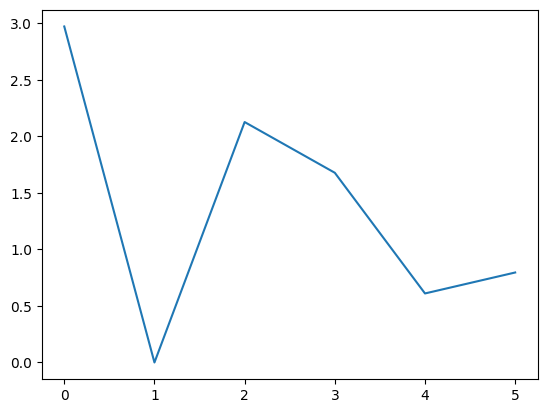

In [68]:
import matplotlib.pyplot as plt
plt.plot(beList)

#### Cohesion Score => Perplexity(응집도)

In [ ]:
# 주어진 데이터의 확률분포가 얼마나 가까이 뭉쳐있는지 보는 것.
# 단어에 빗대어 볼 것.
A가 들어갔을 때 BCDE의 응집력은?
CS(BCDE|A) = P(ABCDE)/P(A)
           = P(CDE|AB)P(AB_CDE)/P(AB)P(A) ... 하나가 남을 때까지 진행
           = P(A,B)/P(A) = P(A|B)
           = P(A,B,C)/P(A,B) = P(C|A,B)
             P(F|A,B,C,D,E)/P(A,B,C,D,E)
                
           쭉 전개하면 P(A,B,C,D,E)/P(A) 만 남음
        
        sqrt(P(A,B,C,D,E)/P(A))**1/len(ABCDE) => 글자가 길어지면 길어질수록 확률값도가 나눠지는 제곱이 커져서(제곱근)
        뒤로 가면 갈수록 떨어짐 => 세상에 긴 단어는 나타날수 없다는 것.
        이는 근사하면 A가 나타난 횟수 중에 
        
어떤 음절 다음에 브랜치가 확 생겨서 경우의 수가 많아지면 바로 앞의 케이스보다 P(A,B,C,D,E)이 값이 떨어짐

이는 응집력을 보고싶은 스코어. 응집력은 확률값을 비교하여.
어떤 값이 떨어지는 지점을 찾자! 그것을 응집력과 엔트로피를 활용한 것

In [79]:
from math import sqrt

#CS = lambda n1, n2, n3:(n1/n2)**(1/n3)  # n1/n2 는 확률, n3은 제곱근 부분
CS = lambda n1, n2, n3:sqrt(n1/n2)   # 변형. 뒤로 갈수록 응집력이 떨어지니까

In [80]:
q = '대통령의'

n1 = tokens[q]  # 딱 그 글자만
n2 = sum(tokenList(q[:1]).values())
n3 = len(q)

CS(n1, n2, n3), n1, n2, n3

(0.16043579703549393, 87, 3380, 4)

In [75]:
tokenList('대통령')

{'대통령이': 129,
 '대통령과': 80,
 '대통령의': 87,
 '대통령은': 128,
 '대통령에게': 8,
 '대통령': 135,
 '대통령실': 43,
 '대통령실은': 15,
 '대통령께서': 7,
 '대통령도': 10,
 '대통령으로서': 4,
 '대통령령으로': 1,
 '대통령을': 14,
 '대통령실대통령실': 1,
 '대통령실에서도': 1,
 '대통령실이': 4,
 '대통령과의': 8,
 '대통령실에': 3,
 '대통령께서는': 2,
 '대통령실의': 9,
 '대통령실을': 2,
 '대통령에': 4,
 '대통령실에서': 5,
 '대통령실이나': 3,
 '대통령실애서': 1,
 '대통령제가': 1,
 '대통령제의': 1,
 '대통령제는': 1,
 '대통령제': 1,
 '대통령실도': 2,
 '대통령·기시다': 1,
 '대통령님도': 1,
 '대통령까지': 1,
 '대통령한테.◎': 1,
 '대통령조차': 1,
 '대통령으로서는': 1,
 '대통령실과': 1,
 '대통령하고': 1,
 '대통령하고는': 1,
 '대통령이문제를': 1,
 '대통령실에서는': 1,
 '대통령한테도': 1,
 '대통령이나': 1,
 '대통령이라면': 1,
 '대통령한테': 2,
 '대통령이다': 1,
 '대통령-노동부': 1,
 '대통령실-與지도부': 1,
 '대통령비서실': 1,
 '대통령으로': 1}

In [ ]:
대통령    (0.3418264694316197, 135, 3380, 3)
대통령이   (0.4419959119059168, 129, 3380, 4)
대통령의   (0.4005443758630171, 87, 3380, 4)

# 응집력이기 때문에 숫자가 크면 클수록 좋음

In [85]:
# 다르게 만들어보기

q = ''

n1 = sum(tokenList(q).values()) # 지금은 대통령으로 시작하는 모든 빈도의 합
n2 = sum(tokenList(q[:1]).values()) # 대~ 로 시작하는 모든 빈도의 합
n3 = len(q)

CS(n1, n2, n3), n1, n2, n3

(0.17541160386140583, 2, 65, 2)

In [83]:
대통령    (0.46505073846744127, 731, 3380, 3)
# ------------------------------ 훅 떨어짐 => 여기서 split 해야 한다는 것.
대통령이   (0.1983661070496558, 133, 3380, 4)
대통령의   (0.16043579703549393, 87, 3380, 4)

NameError: name '대통령' is not defined

In [ ]:
# 뒤로 갈수록 응집력 값이 훅 떨어짐
# 응집력이 떨어진다는 것은 위는 어근을 공유하는데 밑으로 넘어가는 순간 어미에 변화가 생겼다는 것
# 얼만큼 떨어졌을 때 자를까 또한 통계적이든 threshold 를 가져가야 함.
# 이것도 새로운 형태의 토크나이징 기법이 될 수 있음.
# 외래어를 한글로 바꿀 때 정말 좋음

In [ ]:
# 다시 정리
Tokenizing 이 중요한데, feature 추출 관점에서, 나중에 모델에도 이용할 것이기 때문에.
토큰을 어떻게?
토크나이징 종류들 => sent/word/Twitter/regex_tokenizer
이걸로도 부족해서
형태소 분석기(morpheme analyzer), 영어에서는 Stemming+  lemmatizaion(우리말에서는 in ma)
stemming 어떻게?
그 방법 중에 n-gram, be, CS, bpe 도 있음    => 이렇게 뽑았을 때 어떤 토큰이 중요한지는 지프의 법칙으로 찾는 것.
그리고 이렇게 뽑았을 때 이게 적절한 수의 토큰인가? 는 힙스의 법칙으로 보는 것

특히, n-gram은 stemming 즉 토큰 찾을때도 쓰는데
LM 으로도 사용됐음

#### bitepair encoding

In [ ]:
SPTokenizer(패키지 이름; SP = SentencePiece) 이 안에 구현된 것이 WordPieceModel(Google); WPM
WPM -> BPE(Byte Pair Encoding)을 근간으로 함.
       바이트 쌍(두글자의 쌍)으로 인코딩하는 방법 -> 자주 나오는 인접한 두 글자를 하나의 쌍으로 취급해서 인코딩하는 방법.
    가장 많이 나온 쌍을 찾기 때문에 통계를 이용. 가장 많이 겹치는 분절(subword), 가장 많이 사용되는 분절을 하나의 덩이로 봄.

In [ ]:
구글에서 이야기하는 WPM을 보자. 한 단어를 서브 워드들로 분리하는 형태의 stemming 하는 모델. 정확히는 토큰화하는 모델
stemming 은 정확한 의미로는 어간분리라서 뒤쪽에 애들 자르고 어간만 추출하는 것인데, 토큰화는 토큰들을 찾는 것. WPM은 하나의 단어를 분절들로
구분해서 분리하는 모델. 따라서 토크나이징 기법이라고 하는 것이 정확함.

In [ ]:
BPE 는 데이터를 압축하기 위한 형태.
Huffman Encoding => 가장 많이 나온 애들을 가지고 트리를 구성을 해서 짧은 path를 만듦.
a-z:26 -> 최소 5bits 필요. 32이기 때문. 
    25글자를 5비트만큼 곱하면 130bits 가 필요
    z를 잘 안쓰면 더 긴 코드 부여, 모음(aeiou)에 짧은 코드 부여 => 비트 압축; the -> T
most common pair 를 찾아서 하나의 바이트로 교체하는 것이 목적

여러개의 낱자(가장 많이 나오는 쌍을 한 글자로 바꾸자)
여러개의 낱자 = 여러개의 토큰. 이 중에서 가장 많이 나오는 쌍을 한 토큰으로 바꾸는 것. 이게 BPE의 목적
그렇게 되면, 

In [86]:
tokens

Counter({'1박2일': 9,
         '일정으로': 18,
         '일본을': 44,
         '방문한': 25,
         '윤석열': 255,
         '대통령이': 129,
         '17일': 198,
         '도쿄': 66,
         '한': 349,
         '호텔에서': 6,
         '열린': 107,
         '일한': 18,
         '친선단체': 6,
         '및': 596,
         '일본': 419,
         '정계': 6,
         '지도자를': 3,
         '접견에서': 2,
         '일한의원연맹': 8,
         '회장에': 6,
         '취임하는': 4,
         '스가': 13,
         '요시히데': 8,
         '전': 433,
         '총리와': 24,
         '인사하고': 5,
         '있다': 682,
         '.': 12025,
         '연합뉴스': 271,
         '김경민': 3,
         '특파원': 16,
         '방일': 19,
         '중인': 45,
         '정치권': 13,
         '인사들과': 2,
         '만나': 23,
         '한일': 334,
         '갈등': 4,
         '주요': 95,
         '현안에': 6,
         '대해': 226,
         '논의했다': 6,
         '제1야당인': 2,
         '입헌민주당의': 1,
         '이즈미': 6,
         '겐타': 3,
         '대표는': 88,
         '이날': 196,
         '윤': 173,
         '대통령과': 80,
       

In [ ]:
'친선단체', '친', '선', '단', '체' -> 1음절짜리 다 단어가 됨. 그래서 4개의 토큰이 필요한 것.
그리고 나올 수 있는 모든 쌍들; 친선 선단 단체 .... 엄청 많아짐.
그런데 친선 이 most common 하면, 따로 쪼개지말고 친선 이라는 이름으로 하나로 만들라는 것. 그러면 토큰이 몇개 사라지고 1개 남고!
더 나아가 친선단체도 하나의 토큰으로 봐라! 이게 BPE 이 돌아가는 구조

특히 WPM 은 데이터를 wikipedia 를 활용 -> BPE() 를 돌림 적절한 threshold를 가지고.
그래서 위와 같은 단어 쌍 1000개 찾아라 하면 1000개 찾고 멈춤. 나머지 글자들은 쪼개져 있는 상태로 되어 있음.
이 상태로 토큰화하는 기법이 WPM. 얘를 쓰려면 구글에서 학습해놓은 데이터를 가져다 써야함.

BPE

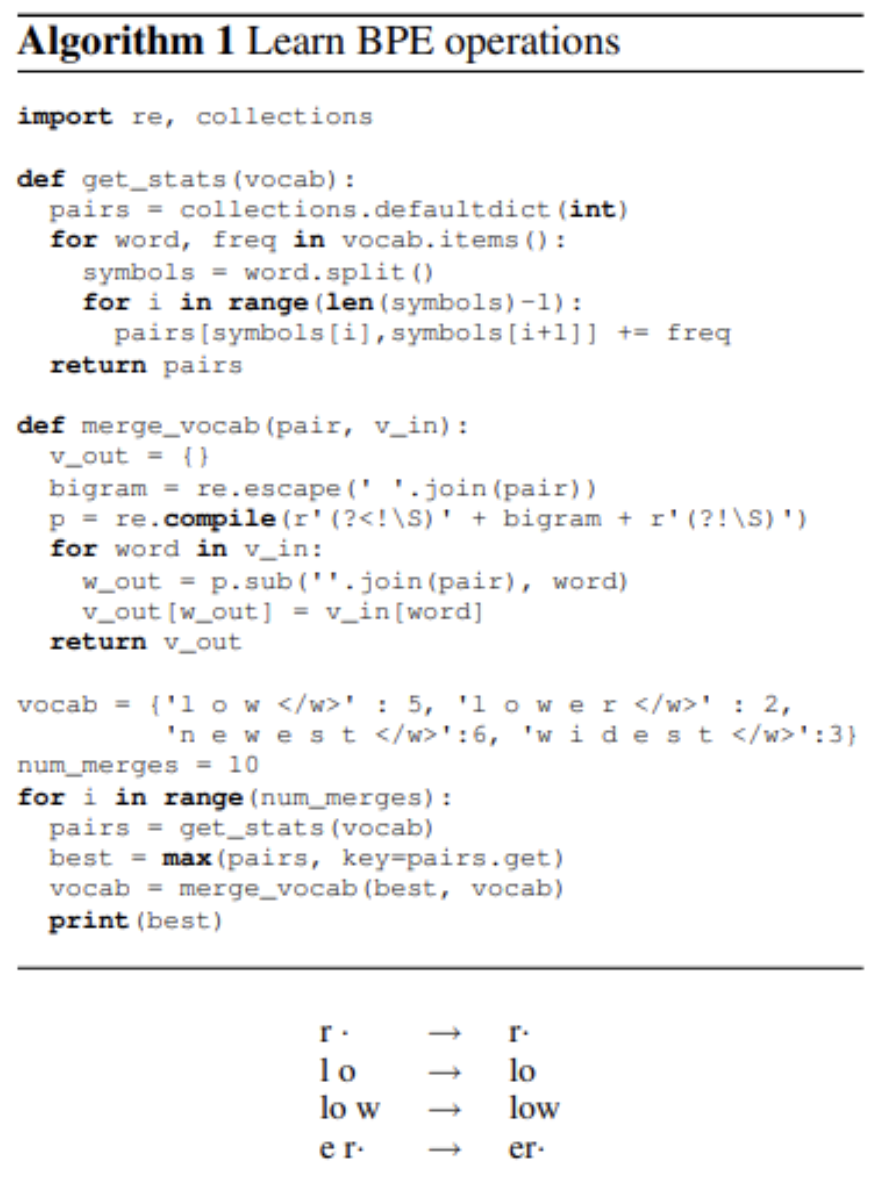

In [ ]:
# 같은 토큰들을 찾아야 함. 아니면 싹다 분절되어 너무 많아짐.
# 기계가 알아낼 수 있도록 하는 것이 이 방법.
# 글자들을 다 쪼개놓고 most_common 한 pair 를 찾아서 하나의 byte 로 삼겠다는 것.
# 그래서 여기서 bigram 개념이 나옴. 쌍으로 묶고 빈도를 다 찾음.
# 그러면 가장 많이 나온 쌍이 있고 얘네들을 하나의 글자로 취급하기 위해 합침. 그것을 토큰으로써 사용하겠다는 것.

In [ ]:
우리는 지금까지 어근, 어간 찾는 용도 (핵심되는 단어들을 추출)
이 문자열을 뒤집어서 하면 어미나 접사를 찾는 것이 됨. (불필요한 단어를 제거)

In [16]:
D = {'low':5, 'lower':2, 'newest':5, 'widest':3}

#전처리
def preprocessing(d):
    result = dict()
    # 쪼개고, 단어의 마지막에 </w> 붙여주고.
    for k,v in d.items():
        nk = ' '.join(list(k)+['</w>']) # ['l', 'o', 'w'] + ['</w>']
        result[nk] = v
    return result

preprocessing(D)

{'l o w </w>': 5,
 'l o w e r </w>': 2,
 'n e w e s t </w>': 5,
 'w i d e s t </w>': 3}

In [17]:
D.items()

dict_items([('low', 5), ('lower', 2), ('newest', 5), ('widest', 3)])

In [18]:
list('low')

['l', 'o', 'w']

In [19]:
'l o w </w>'.split()

['l', 'o', 'w', '</w>']

In [20]:
d = preprocessing(D)

pairs = dict()
for k,v in d.items():
    for i in range(len(k.split())-(2-1)):   # bi-gram 찾기
        bigram = ' '.join(k.split()[i:i+2])
        if bigram in pairs:
            pairs[bigram] += v
        else:
            pairs[bigram] = v

In [35]:
list(d.keys())[0].split()

['l', 'o', 'w', '</w>']

In [36]:
pairs

{'l o': 7,
 'o w': 7,
 'w </w>': 5,
 'w e': 7,
 'e r': 2,
 'r </w>': 2,
 'n e': 5,
 'e w': 5,
 'e s': 8,
 's t': 8,
 't </w>': 8,
 'w i': 3,
 'i d': 3,
 'd e': 3}

In [37]:
max(pairs)  # 이건 key 값을 기준. 가장 마지막 글자 w

'w i'

In [38]:
max(pairs, key=pairs.get)  # 우리가 찾는 것은 key. max 함수 안의 파라미터 key는 누구를 기준으로 정렬할 것인지.
# pairs 는 dict의 key만 준 것

'e s'

In [39]:
bestkey = max(pairs, key=pairs.get)

In [40]:
for k,v in d.items():
    nk = re.sub(bestkey, re.sub(' ', '', bestkey), k)  # 앞에가 패턴
    print({nk:v})

{'l o w </w>': 5}
{'l o w e r </w>': 2}
{'n e w es t </w>': 5}
{'w i d es t </w>': 3}


In [41]:
d = preprocessing(D)
for _ in range(10):
    # 바이그램(쌍) 찾는 부분
    pairs = dict()
    for k,v in d.items():
        for i in range(len(k.split())-(2-1)):   # bi-gram 찾기
            bigram = ' '.join(k.split()[i:i+2])
            if bigram in pairs:
                pairs[bigram] += v
            else:
                pairs[bigram] = v
                
    # 빈도 가장 높은 쌍 찾는 부분
    bestkey = max(pairs, key=pairs.get)
    
    # merge 하는 부분
    newd = dict()
    for k,v in d.items():
        nk = re.sub(bestkey, re.sub(' ', '', bestkey), k)  # 앞에가 패턴
        newd[nk] = v
    d = newd
    print(bestkey)

e s
es t
est </w>
l o
lo w
low </w>
n e
ne w
new est</w>
w i


In [42]:
# 위에서 어떤 쌍 찾았는지 나옴.
list(d.keys())

['low</w>', 'low e r </w>', 'newest</w>', 'wi d est</w>']

In [43]:
[k for k in ' '.join(d.keys()).split() if len(k) > 1]  # 얘네들을 토큰으로서 활용하자는 것.

['low</w>', 'low', '</w>', 'newest</w>', 'wi', 'est</w>']

In [ ]:
# BPE 을 기반으로한 WPM
# </w> 가 붙은 것이 어미라는 것.

In [108]:
# 우리 걸로 해보자
# 이게 딥러닝 넘어오면서 가장 많이 쓰는 방법이 될 것
d = preprocessing(tokens)

for _ in range(100):
    # 바이그램(쌍) 찾는 부분
    pairs = dict()
    for k,v in d.items():
        for i in range(len(k.split())-(2-1)):   # bi-gram 찾기
            bigram = ' '.join(k.split()[i:i+2])
            if bigram in pairs:
                pairs[bigram] += v
            else:
                pairs[bigram] = v
                
    # 빈도 가장 높은 쌍 찾는 부분
    bestkey = max(pairs, key=pairs.get)
    
    # merge 하는 부분
    newd = dict()
    for k,v in d.items():
        nk = re.sub(bestkey, re.sub(' ', '', bestkey), k)  # 앞에가 패턴
        newd[nk] = v
    d = newd
    print(re.sub(' ', '', bestkey))

다</w>
.</w>
니다</w>
에.</w>
습니다</w>
으.</w>
있습니다</w>
세.</w>
다.
하.</w>
가.</w>
했다</w>
뉴스
기사
시.</w>
구독
이.</w>
라.</w>
합니다</w>
지.</w>
까.</w>
보세.</w>
인에.</w>
로.</w>
해.</w>
사에.</w>
메인에.</w>
언론
추천
해보세.</w>
섹션
섹.</w>
추천합니다</w>
섹션으.</w>
언론사에.</w>
러가.</w>
주요
보러가.</w>
주요뉴스
었습니다</w>
기.</w>
되었습니다</w>
보.</w>
부.</w>
정.</w>
있다</w>
일.</w>
경.</w>
20
했습니다</w>
확인
50
서.</w>
진.</w>
됩니다</w>
24
니다.
배.</w>
들.</w>
..</w>
주세.</w>
속..</w>
24시.</w>
바로
활용
바로가.</w>
확인해보세.</w>
흥미
분류
구독해보세.</w>
50회
50회까.</w>
쏠쏠
쏠쏠정.</w>
흥미진.</w>
후속..</w>
기사라.</w>
눌러
눌러주세.</w>
기사배.</w>
활용됩니다</w>
분류했습니다</w>
주요뉴스해.</w>
적으.</w>
것으.</w>
해지
판에.</w>
이..</w>
프로.</w>
구독되었습니다</w>
뉴스판에.</w>
해지되었습니다</w>
하..</w>
했다.
한국
입니다</w>
...</w>
·...</w>
니...</w>
…...</w>


In [ ]:
# 데이터를 기반으로 해서 가장 많이 나온 패턴을 찾기 때문에, max 부분을 찾는게 확률값 가장 큰 부분 찾는 것과 엇비슷함.
# 특히 BPE 는 핵심되는 분절을 찾음. 앞에서는 확률을 이용했기 떄문에 단어의 시작부터 뒤짐. 그래서 엔트로피 값을 추적할 수 있었음.
# 그러나 여기서는 빈도순으로 해서 접두, 접미 부분도 다 자를 수 있고 언어적 지식을 가정하지 않아서 어느 언어권이든 다 사용할 수 있음.
# 가장 많이 나온 쌍들 위주로 찾아가기 때문

#### edit-distance

#### Normalization

In [ ]:
# 위 과정들을 거쳐 단어들을 다 찾으면 이게 다 찾은 것인지 모름.
# 정형화된 툴로 정규화를 시켜줘야 함.
# Text normalization -> Text 를 트랜스포밍하는 것.
# 그 기준은 여러개가 있음.
# 모든 NLP 관련해서는 반드시 normalization 을 함.
# 뉴럴 네트워크 한 층 건너면 아웃풋 나오는데 그게 분포가 서로 달라서, 그걸 가지고 미분을 통해 극점을 찾는 것
# 즉 경계선이 없는 쪽으로 가야하는데 꼬리 쪽에서 시작하면 사라지거나 등등 학습이 잘 안됨.
# normalization 을 하면 레이어를 깊게 쌓아도 학습, 성능에 도움이 됨. 층을 여러개 쌓으면 앞에다가 항상 배치 normalization 을 함.

# 여기서도 좋은 feature를 뽑기 위함. normalization 을 통해 모델의 성능에 영향을 주고 좋은 피쳐로 될 수 있도록 만들어주는 과정.
# 특히 word의 format을 정규화. 단어의 생김을 표준화해서 맞춰주는 것이 가장 큰 목적.

# 우리가 하듯이 split, 정규식을 가지고 전처리를 하고 word_tokenizer 하면 다 쪼개버림. 의미적으로 달라질 수 있음
# state-of-the-art => state art ( of, the 는 지프의 법칙에 의해 사라질 것.)

# 이것을 표준화 해서 맞춰주는 것이 좋음.

# 우리말은 조사, 어미를 가지고 고민함.

In [ ]:
# 암튼 영어일 때는 어떤 기준?
# 먼저 대소문자 맞춰줌. 거의 대부분은 대소문자 일치를 위해 raw case로 맞춤
# nltk word_tokenizer, punctuation 사용

In [ ]:
# 영어든 한국어든 Punctuation 자주 사용
# 구두점 그런데 함부로 날리면 문제가 됨.

In [109]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [119]:
sentence = '''I'd like to learn more somthing.
              I'd like to learn more somthing.'''

In [114]:
word_tokenize(sentence, preserve_line=True)  # preserve_line 은 구두점을 분리 할까 말까

['i',
 "'d",
 'like',
 'to',
 'learn',
 'more',
 'somthing.',
 'i',
 "'d",
 'like',
 'to',
 'learn',
 'more',
 'somthing',
 '.']

In [115]:
len(word_tokenize(sentence, preserve_line=False))

16

In [116]:
len(set(word_tokenize(sentence, preserve_line=False)))

8

In [117]:
list(set(word_tokenize(sentence, preserve_line=False)))

['i', 'somthing', 'like', '.', 'learn', "'d", 'to', 'more']

In [120]:
# punctuation 은 이스케이프 처리 해줘야 함. \ 때문에
re.sub('[{}]'.format(re.escape(punctuation)), '', sentence)

'Id like to learn more somthing\n              Id like to learn more somthing'

In [122]:
list(set(re.sub('[{}]'.format(re.escape(punctuation)), ' ', sentence.lower()).split()))
# 'd 가 안나옴. 이러면 우리는 would 등의 원형을 찾아갈 수 있는데 여기서는 그럴 수 없음

['i', 'somthing', 'like', 'learn', 'd', 'to', 'more']

In [123]:
from nltk.tag import pos_tag

In [124]:
pos_tag(word_tokenize(sentence))

[('I', 'PRP'),
 ("'d", 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('learn', 'VB'),
 ('more', 'JJR'),
 ('somthing', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ("'d", 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('learn', 'VB'),
 ('more', 'JJR'),
 ('somthing', 'NN'),
 ('.', '.')]

In [ ]:
#lemmatization 하면 원형으로 복원 할 것. 위에서
# punctuation 을 제거하는 것이 normalization 의 한 방법.
# 장점은 토큰의 수를 줄 일 수 있는데, 단점은 'd 같은 어퍼스트로피 인식 못함. state-of-the-art 도